# <span style='color:Blue'>Importing Necessary Packages:</span>
### Data Manipulation Libraries:
    - Numpy 
    - Pandas
    - Seaborn
### Machine Learning Library:
    - Sklearn



# <span style='color:rgb(66,108,69)'>Project Overview:</span>
### Data:
 The following data is combined from several resources including the World Bank.
 The Data includes the outcomes from Matches in the 2014, 2018, and 2022 World Cup Qualifiers along with other
 relevant data such as Economic and FIFA Qualifying Points.
 
 ### The Goal:
 To predict the outcome of world cup matches based on data from qualifying matches along with additional data drawn from other sources.
 ### Implementation:
 After Data manipulation such as Min-Max scaling and encoding, the model uses a voting classifier to predict the outcome.
 The voting classifier uses a wisdom of the crowd approach by asking several trained models what their prediction would be on a given match and going with the majority rules principle. The underlying models that compose the voting classifier are Logisitic Regression, a Random Forest, a Decision Tree and a Support Vector Machine.
 
 ### Results:
 The model is evaluated using k-fold cross validation, which splits the testing data into a number of folds, or groups, that will be evaluated by the model. This gives a more accurate idea of how well the model will perform across new data, as it reveals the average performance of the model across several folds. Overall, the average accuracy obtained in predicting the correct outcome of matches from the k-fold cross validation was 67% with a standard deviation of 6.1%.
 
    




In [1]:
import seaborn as sns
from sklearn import *
import numpy as np
import pandas as pd

# <span style='color:Blue'>Importing Datasets:</span>

### Data from 2014, 2018 & 2022 World Cup Qualifying Matches:

In [2]:
#2014 WC Qualifying Matches dataset
WC_Qualifiers_2014 = pd.read_csv('WC_Qualifiers_2014_1.csv')
del WC_Qualifiers_2014["Unnamed: 0"]
WC_Qualifiers_2014

,Winning Team,Home Team,Away Team,Date,Away Team GDP,Home Team GDP,GDP Difference,Away Team POP.,Home Team POP.,Away Team Qualifying Points,Home Team Qualifying Points
0,1,Croatia,N.Macedonia,07.09.12,1.268307e+10,5.833029e+10,4.564722e+10,2067471.0,4238389.0,298.0,871.0
1,0,Wales,Belgium,07.09.12,5.353902e+11,3.138690e+10,-5.040033e+11,11209057.0,45272155.0,1039.0,613.0
2,2,Scotland,Serbia,08.09.12,4.706221e+10,3.138690e+10,-1.567531e+10,7130576.0,45272155.0,759.0,825.0
3,1,Serbia,Wales,11.09.12,3.138690e+10,4.706221e+10,1.567531e+10,45272155.0,7130576.0,613.0,759.0
4,2,Belgium,Croatia,11.09.12,5.833029e+10,5.353902e+11,4.770599e+11,4238389.0,11209057.0,871.0,1039.0
...,...,...,...,...,...,...,...,...,...,...,...
255,0,Georgia,Finland,10.09.13,2.748628e+11,1.762700e+10,-2.572358e+11,5461512.0,3719414.0,578.0,303.0
256,0,Belarus,France,10.09.13,2.855964e+12,7.881384e+10,-2.777151e+12,66312067.0,9448515.0,935.0,404.0
257,1,Spain,Belarus,11.10.13,7.881384e+10,1.371223e+12,1.292409e+12,9448515.0,46480882.0,404.0,1460.0
258,1,France,Finland,15.10.13,2.748628e+11,2.855964e+12,2.581102e+12,5461512.0,66312067.0,578.0,935.0


In [3]:
#2018 WC Qualfiying Matches dataset
WC_Qualifiers_2018 = pd.read_csv('WC_Qualifiers_2018_1.csv')
del WC_Qualifiers_2018["Unnamed: 0"]
WC_Qualifiers_2018

,Winning Team,Home Team,Away Team,Date,Away Team GDP,Home Team GDP,GDP Difference,Away Team POP.,Home Team POP.,Away Team Qualifying Points,Home Team Qualifying Points
0,2,Belarus,France,06.09.16,2.790957e+12,6.003126e+10,-2.730926e+12,67101930.0,9438785.0,1198,417
1,1,Bulgaria,Luxembourg,06.09.16,7.128502e+10,6.636342e+10,-4.921597e+09,607950.0,7025037.0,390,614
2,2,Sweden,Netherlands,06.09.16,9.140434e+11,5.554554e+11,-3.585881e+11,17231624.0,10175214.0,981,880
3,1,France,Bulgaria,07.10.16,6.636342e+10,2.790957e+12,2.724593e+12,7025037.0,67101930.0,614,1198
4,0,Luxembourg,Sweden,07.10.16,5.554554e+11,7.128502e+10,-4.841704e+11,10175214.0,607950.0,880,390
...,...,...,...,...,...,...,...,...,...,...,...
265,0,Turkey,Iceland,06.10.17,2.626706e+10,7.784719e+11,7.522048e+11,352721.0,82340090.0,908,706
266,0,Kosovo,Ukraine,06.10.17,1.308910e+11,7.878509e+09,-1.230125e+11,44622518.0,1797085.0,733,197
267,2,Finland,Turkey,09.10.17,7.784719e+11,2.757151e+11,-5.027568e+11,82340090.0,5515525.0,706,486
268,0,Ukraine,Croatia,09.10.17,6.224787e+10,1.308910e+11,6.864317e+10,4087843.0,44622518.0,945,733


In [4]:
#2022 WC Qualfiying Matches dataset
WC_Qualifiers_2022 = pd.read_csv('WC_Qualifiers_2022_2.csv')
del WC_Qualifiers_2022["Unnamed: 0"]
WC_Qualifiers_2022

,Winning Team,Home Team,Away Team,Date,Away Team GDP,Home Team GDP,GDP Difference,Away Team POP.,Home Team POP.,Away Team Qualifying Points,Home Team Qualifying Points
0,1,Serbia,Ireland,24.03.21,4.985596e+11,6.306813e+10,-4.354914e+11,5028230.0,6844078.0,1192.09,1563.62
1,1,Portugal,Azerbaijan,24.03.21,5.462218e+10,2.498865e+11,1.952643e+11,10145212.0,10299423.0,1146.72,1676.56
2,2,Serbia,Portugal,27.03.21,2.498865e+11,6.306813e+10,-1.868183e+11,10299423.0,6844078.0,1676.56,1563.62
3,0,Ireland,Luxembourg,27.03.21,8.671080e+10,4.985596e+11,4.118488e+11,639070.0,5028230.0,1243.80,1192.09
4,0,Azerbaijan,Serbia,30.03.21,6.306813e+10,5.462218e+10,-8.445958e+09,6844078.0,10145212.0,1563.62,1146.72
...,...,...,...,...,...,...,...,...,...,...,...
245,2,Romania,Iceland,11.11.21,2.545893e+10,2.840876e+11,2.586286e+11,372295.0,19115146.0,1384.41,1434.68
246,1,Germany,Liechtenstein,11.11.21,1.822805e+11,4.223116e+12,4.040836e+12,38254.0,83129285.0,862.39,1650.21
247,1,N.Macedonia,Iceland,14.11.21,2.545893e+10,1.387927e+10,-1.157966e+10,372295.0,38254.0,1384.41,1192.09
248,0,Armenia,Germany,14.11.21,4.223116e+12,1.386118e+10,-4.209255e+12,83129285.0,2968128.0,1650.21,1233.93


### 2018 World Cup Data:

In [5]:
#Data from actual WC
WC_2018 = pd.read_csv('WC_2018_1.csv')
del WC_2018["Unnamed: 0"]
WC_2018

,Winning Team,Home Team,Away Team,Date,Away Team GDP,Home Team GDP,GDP Difference,Away Team POP.,Home Team POP.,Away Team Qualifying Points,Home Team Qualifying Points
0,1,France,Croatia,15.07.18,6.224787e+10,2.790957e+12,2.728709e+12,4087843.0,67101930.0,945,1198
1,1,Belgium,England,14.07.18,3.977289e+12,5.433474e+11,-3.433942e+12,352721.0,11427054.0,1051,1298
2,1,France,Belgium,10.07.18,5.433474e+11,2.790957e+12,2.247610e+12,11427054.0,67101930.0,1298,1198
3,1,Croatia,England,11.07.18,3.977289e+12,6.224787e+10,-3.915042e+12,352721.0,4087843.0,1051,945
4,0,Uruguay,France,06.07.18,2.790957e+12,6.451504e+10,-2.726442e+12,67101930.0,3449290.0,1198,1018
...,...,...,...,...,...,...,...,...,...,...,...
59,0,Poland,Senegal,19.06.18,2.311690e+10,5.874117e+11,5.642948e+11,15854324.0,37974750.0,838,1183
60,2,Japan,Senegal,24.06.18,2.311690e+10,5.037835e+12,5.014718e+12,15854324.0,126811000.0,838,521
61,0,Poland,Colombia,24.06.18,3.341982e+11,5.874117e+11,2.532135e+11,49661056.0,37974750.0,986,1183
62,0,Japan,Poland,28.06.18,5.874117e+11,5.037835e+12,4.450424e+12,37974750.0,126811000.0,1183,521


# Combining the Data Into a Single Dataset

In [6]:
WC_QUALIFIERS_14_18 = pd.concat([WC_Qualifiers_2014,WC_Qualifiers_2018,WC_Qualifiers_2022,WC_2018])

# Encoding the Data:

In [7]:
#Encodes the categorical columns to be binary columns
WC_QUALIFIERS_14_18_Encoded = pd.get_dummies(WC_QUALIFIERS_14_18,columns=["Home Team", "Away Team","Date"])
WC_18_Encoded = pd.get_dummies(WC_2018,columns=["Home Team", "Away Team","Date"])
WC_QUALIFIERS_14_18_Encoded

,Winning Team,Away Team GDP,Home Team GDP,GDP Difference,Away Team POP.,Home Team POP.,Away Team Qualifying Points,Home Team Qualifying Points,Home Team_Albania,Home Team_Andorra,...,Date_26.03.17,Date_26.06.18,Date_27.03.21,Date_27.06.18,Date_28.03.21,Date_28.06.18,Date_30.03.21,Date_30.06.18,Date_31.03.21,Date_31.08.17
0,1,1.268307e+10,5.833029e+10,4.564722e+10,2067471.0,4238389.0,298.0,871.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.353902e+11,3.138690e+10,-5.040033e+11,11209057.0,45272155.0,1039.0,613.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4.706221e+10,3.138690e+10,-1.567531e+10,7130576.0,45272155.0,759.0,825.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.138690e+10,4.706221e+10,1.567531e+10,45272155.0,7130576.0,613.0,759.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,5.833029e+10,5.353902e+11,4.770599e+11,4238389.0,11209057.0,871.0,1039.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,2.311690e+10,5.874117e+11,5.642948e+11,15854324.0,37974750.0,838.0,1183.0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,2,2.311690e+10,5.037835e+12,5.014718e+12,15854324.0,126811000.0,838.0,521.0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,3.341982e+11,5.874117e+11,2.532135e+11,49661056.0,37974750.0,986.0,1183.0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,5.874117e+11,5.037835e+12,4.450424e+12,37974750.0,126811000.0,1183.0,521.0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Scaling the Data:

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
WC_QUALIFIERS_14_18_Encoded[["Away Team GDP","Home Team GDP","GDP Difference", 
                             "Away Team POP.","Home Team POP.","Home Team Qualifying Points","Away Team Qualifying Points"]] = scale.fit_transform(WC_QUALIFIERS_14_18_Encoded[["Away Team GDP","Home Team GDP","GDP Difference", 
                             "Away Team POP.","Home Team POP.","Home Team Qualifying Points","Away Team Qualifying Points"]])

# Creating Voting Classifier:

In [9]:
#CREATES VOTING CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import *

## Defining the components of voting classifier:

In [10]:
log_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier(max_depth=5,random_state=random.seed(42))
decision_tree_model = DecisionTreeClassifier(max_depth=5,random_state=random.seed(42))
Support_vector_machine = SVC()

## Defining model to exclude 2018 World Cup data from training set:

In [11]:
X = WC_QUALIFIERS_14_18_Encoded.iloc[:779,1:]
y = WC_QUALIFIERS_14_18_Encoded.iloc[:779,0]

In [12]:
voting_clf = VotingClassifier(
    estimators=[('Logistic',log_regression_model),('rf',random_forest_model),('dt',decision_tree_model),('svc',Support_vector_machine)],
    voting='hard')

## Spliting data for training:

In [13]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)



### Defining Dataset:

In [14]:
#Create data subset that only contains the actual matches from 2018 WC (Note: Does not include any qualifiers)
X_ = WC_QUALIFIERS_14_18_Encoded.iloc[780:,1:]
y_ = WC_QUALIFIERS_14_18_Encoded.iloc[780:,0]


In [15]:
#sklearn.set_config(print_changed_only=False)

## Displaying Model's Performance:

In [16]:
from sklearn.metrics import accuracy_score
for model in (log_regression_model,random_forest_model,decision_tree_model,Support_vector_machine,voting_clf):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    yp = model.predict(X_)
    print(model, accuracy_score(y_test, y_pred))
    
print("Testing on 2018 WC: ", model, accuracy_score(y_, yp))

LogisticRegression() 0.6346153846153846
RandomForestClassifier(max_depth=5) 0.6217948717948718
DecisionTreeClassifier(max_depth=5) 0.6538461538461539
SVC() 0.6730769230769231
VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_depth=5)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('svc', SVC())]) 0.6858974358974359
Testing on 2018 WC:  VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_depth=5)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('svc', SVC())]) 0.578125


# Finding variance in performance:

In [17]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression


#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

#splitting data into folds
ksplits =KFold(n_splits=10,random_state=42,shuffle=True)
score=cross_val_score(voting_clf,X_train,y_train,scoring='accuracy',cv=ksplits)

### Model Accuracy for Each Fold:

In [18]:
print("Cross Validation accuracy on Each Fold: \n" + str(score))

Cross Validation accuracy on Each Fold: 
[0.68253968 0.66666667 0.71428571 0.66129032 0.62903226 0.53225806
 0.79032258 0.67741935 0.66129032 0.69354839]


### Average Accuracy score:

In [19]:
print("Average Cross Validation accuracy: " + str(score.mean()))

Average Cross Validation accuracy: 0.6708653353814644


### Standard Deviation of Accuracy:

In [20]:
print("Standard Deviation: " + str(score.std()))

Standard Deviation: 0.061653954935353646


# Displaying Results using Seaborn:

### Creating a confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[45,  6,  0],
       [11, 62,  0],
       [13, 19,  0]], dtype=int64)

### Using Seaborn to Create a Heatmap of Confusion Matrix

#####        -Creates a confusion matrix of the predicted outcome vs actual outcome from the qualifying match test set (defined under "Splitting data for training")

[Text(0.5, 0, 'Away Win'), Text(1.5, 0, 'Home Win'), Text(2.5, 0, 'Tie')]

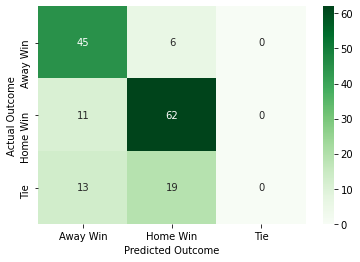

In [22]:
import seaborn as sns

chart = sns.heatmap(confusion_matrix,annot=True,cmap='Greens')
chart.set(xlabel="Predicted Outcome",ylabel="Actual Outcome")
chart.yaxis.set_ticklabels(["Away Win","Home Win","Tie"])
chart.xaxis.set_ticklabels(["Away Win","Home Win","Tie"])

##### -Creates a Confusion Matrix of peformance on 2018 World Cup matches

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_,yp)
confusion_matrix

array([[16,  9,  0],
       [ 4, 21,  1],
       [ 6,  7,  0]], dtype=int64)

[Text(0.5, 0, 'Away Win'), Text(1.5, 0, 'Home Win'), Text(2.5, 0, 'Tie')]

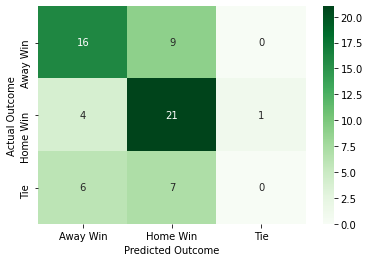

In [24]:
chart = sns.heatmap(confusion_matrix,annot=True,cmap='Greens')
chart.set(xlabel="Predicted Outcome",ylabel="Actual Outcome")
chart.yaxis.set_ticklabels(["Away Win","Home Win","Tie"])
chart.xaxis.set_ticklabels(["Away Win","Home Win","Tie"])